<a href="https://colab.research.google.com/github/Maiven/Python_Practice/blob/master/python_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Solar System - Astroquery 라이브러리 사용하기

In [1]:
pip install pygame

     |████████████████████████████████| 11.5MB 6.6MB/s 


In [2]:
pip install display

  Created wheel for display: filename=display-1.0.0-cp36-none-any.whl size=1406 sha256=6967d326a5ed3b7fdb7c1b2da9e234ec74d95dd51646b43bd84e87c21237d980
  Stored in directory: /root/.cache/pip/wheels/da/65/2c/318b8e036689f425f6e26d51b83ca79bc44625fe96c91ba0bc
Successfully built display


In [3]:
from urllib.parse import parse_qs
# urllib.parse는 python 3의 모듈이다. 2의 경우엔 urlparse 모듈을 사용하자.


my_values = parse_qs('red=5&blue=0&green=',keep_blank_values=True)

In [4]:
red = int(my_values.get('red', [''])[0] or 0)

red = my_values.get('red',[''])
red = int(red[0]) if red[0] else 0
print(red)


5


In [5]:
green = my_values.get('green', [''])
if green[0]:
    green = int(green[0])
    print(green)
else:
    green = 0
    print(green)

0


In [6]:
pip install pandas

In [7]:
pip install --upgrade astropy

Requirement already up-to-date: astropy in /usr/local/lib/python3.6/dist-packages (4.1)


In [12]:
pip install --upgrade astroquery

     |████████████████████████████████| 6.5MB 5.3MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 2.6MB 51.3MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=ce2b1541ded67313dca9152111276c1056ee907c4d5848e4c5bd521b32e9c955
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/astropy/time/core.py", line 548, in _get_time_fmt
    return cls(val, val2, scale, precision, in_subfmt, out_subfmt)
  File "/usr/local/lib/python3.6/dist-packages/astropy/time/formats.py", line 139, in __init__
    self.out_subfmt = out_subfmt
  File "/usr/local/lib/python3.6/dist-packages/astropy/time/formats.py", line 181, in out_subfmt
    self._select_subfmts(subfmt)
  File "/usr/local/lib/python3.6/dist-packages/astropy/time/formats.py", line 392, in _select_subfmts
    raise ValueError(f'subformat {pattern!r} must match one of '
ValueError: subformat 'date' must match one of ['float', 'long', 'decimal', 'str', 'bytes'] for format jd

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-p

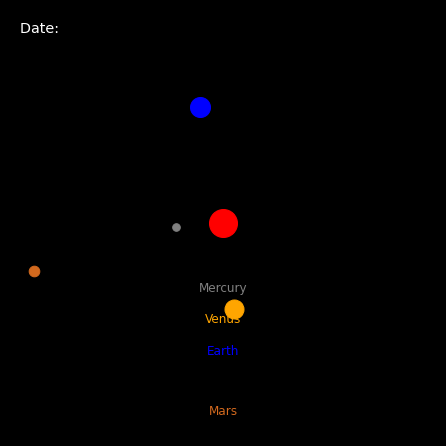

In [14]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import astropy
from astropy.time import Time
from astroquery.jplhorizons import Horizons

sim_start_date = "2018-01-01"     # simulating a solar system starting from this date
sim_duration = 2 * 365                # (int) simulation duration in days
m_earth = 5.9722e24 / 1.98847e30  # Mass of Earth relative to mass of the sun
m_moon = 7.3477e22 / 1.98847e30

class Object:                   # define the objects: the Sun, Earth, Mercury, etc
    def __init__(self, name, rad, color, r, v):
        self.name = name
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.plot = ax.scatter(r[0], r[1], color=color, s=rad**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)

class SolarSystem:
    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
        self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self):           # evolve the trajectories
        dt = 1.0
        self.time += dt
        plots = []
        lines = []
        for p in self.planets:
            p.r += p.v * dt
            acc = -2.959e-4 * p.r / np.sum(p.r**2)**(3./2)  # in units of AU/day^2
            p.v += acc * dt
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            plots.append(p.plot)
            lines.append(p.line)
        self.timestamp.set_text('Date: ' + Time(self.time, format='jd', out_subfmt='date').iso)
        return plots + lines + [self.timestamp]

plt.style.use('dark_background')
fig = plt.figure(figsize=[6, 6])
ax = plt.axes([0., 0., 1., 1.], xlim=(-1.8, 1.8), ylim=(-1.8, 1.8))
ax.set_aspect('equal')
ax.axis('off')
ss = SolarSystem(Object("Sun", 28, 'red', [0, 0, 0], [0, 0, 0]))
ss.time = Time(sim_start_date).jd
colors = ['gray', 'orange', 'blue', 'chocolate']
sizes = [0.38, 0.95, 1., 0.53]
names = ['Mercury', 'Venus', 'Earth', 'Mars']
texty = [.47, .73, 1, 1.5]
for i, nasaid in enumerate([1, 2, 3, 4]):  # The 1st, 2nd, 3rd, 4th planet in solar system
    obj = Horizons(id=nasaid, location="@sun", epochs=ss.time, id_type='id').vectors()
    ss.add_planet(Object(nasaid, 20 * sizes[i], colors[i], 
                         [np.double(obj[xi]) for xi in ['x', 'y', 'z']], 
                         [np.double(obj[vxi]) for vxi in ['vx', 'vy', 'vz']]))
    ax.text(0, - (texty[i] + 0.1), names[i], color=colors[i], zorder=1000, ha='center', fontsize='large')
def animate(i):
    return ss.evolve()
ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=20,)
plt.show()
# ani.save('solar_system_6in_150dpi.mp4', fps=60, dpi=150)